# **LightGBM model for dynamic data**

We will now develop a LightGBM model to predict on the aggregated dynamic data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import lightgbm as lgb

**Load the data**

In [3]:
# Load the data
train_path = '/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/data_analysis/datasets/08_model_input_data/01_feature_set_1/02_lgbm_data/dynamic_data/train_aggregated.parquet'
test_path = '/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/data_analysis/datasets/08_model_input_data/01_feature_set_1/02_lgbm_data/dynamic_data/test_aggregated.parquet'

train_df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

train_df.head()

subject_id  mean_Arterial CO2 Pressure  mean_Arterial O2 pressure  \
0    10001884                   40.689586                 110.926241   
1    10002428                   43.000000                 127.000000   
2    10004235                   37.500000                 100.500000   
3    10010867                   40.689586                 110.926241   
4    10011365                   40.689586                 110.926241   

   mean_Inspired O2 Fraction  mean_Minute Volume  \
0                  40.000000                 6.1   
1                  42.500000                 9.0   
2                  50.000000                10.5   
3                  46.666667                 5.6   
4                  45.000000                 9.4   

   mean_O2 saturation pulseoxymetry  mean_PH (Arterial)  \
0                         97.666667            7.415708   
1                         99.833333            7.430000   
2                         99.333333            7.325000   
3                         97.666667            7.415708   
4                         93.166667            7.415708   

   mean_Peak Insp. Pressure  mean_Respiratory Rate  \
0                      17.0              20.000000   
1                      20.5              22.000000   
2                      11.0              13.666667   
3                      16.0              15.333333   
4                      12.0              17.666667   

   mean_Tidal Volume (observed)  mean_Tidal Volume (spontaneous)  \
0                    472.138379                       470.899154   
1                    380.000000                       355.250000   
2                    472.138379                       470.899154   
3                    467.000000                       467.000000   
4                    344.000000                       344.000000   

   mean_SpO2:FiO2  mean_P:F ratio  extubation_failure  
0        2.441667        2.773156                   1  
1        2.349020        2.988235                   0  
2        1.986667        2.010000                   1  
3        2.092857        2.376991                   0  
4        2.070370        2.465028                   1

**Split the data from the labels**

In [4]:
# Separate X_train and y_train
y_train = train_df['extubation_failure']
X_train = train_df.drop(['subject_id', 'extubation_failure'], axis=1)

# Separate X_test and y_test
y_test = test_df['extubation_failure']
X_test = test_df.drop(['subject_id', 'extubation_failure'], axis=1)

X_train.head()

mean_Arterial CO2 Pressure  mean_Arterial O2 pressure  \
0                   40.689586                 110.926241   
1                   43.000000                 127.000000   
2                   37.500000                 100.500000   
3                   40.689586                 110.926241   
4                   40.689586                 110.926241   

   mean_Inspired O2 Fraction  mean_Minute Volume  \
0                  40.000000                 6.1   
1                  42.500000                 9.0   
2                  50.000000                10.5   
3                  46.666667                 5.6   
4                  45.000000                 9.4   

   mean_O2 saturation pulseoxymetry  mean_PH (Arterial)  \
0                         97.666667            7.415708   
1                         99.833333            7.430000   
2                         99.333333            7.325000   
3                         97.666667            7.415708   
4                         93.166667            7.415708   

   mean_Peak Insp. Pressure  mean_Respiratory Rate  \
0                      17.0              20.000000   
1                      20.5              22.000000   
2                      11.0              13.666667   
3                      16.0              15.333333   
4                      12.0              17.666667   

   mean_Tidal Volume (observed)  mean_Tidal Volume (spontaneous)  \
0                    472.138379                       470.899154   
1                    380.000000                       355.250000   
2                    472.138379                       470.899154   
3                    467.000000                       467.000000   
4                    344.000000                       344.000000   

   mean_SpO2:FiO2  mean_P:F ratio  
0        2.441667        2.773156  
1        2.349020        2.988235  
2        1.986667        2.010000  
3        2.092857        2.376991  
4        2.070370        2.465028

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mean_Arterial CO2 Pressure        3760 non-null   float64
 1   mean_Arterial O2 pressure         3760 non-null   float64
 2   mean_Inspired O2 Fraction         3760 non-null   float64
 3   mean_Minute Volume                3760 non-null   float64
 4   mean_O2 saturation pulseoxymetry  3760 non-null   float64
 5   mean_PH (Arterial)                3760 non-null   float64
 6   mean_Peak Insp. Pressure          3760 non-null   float64
 7   mean_Respiratory Rate             3760 non-null   float64
 8   mean_Tidal Volume (observed)      3760 non-null   float64
 9   mean_Tidal Volume (spontaneous)   3760 non-null   float64
 10  mean_SpO2:FiO2                    3760 non-null   float64
 11  mean_P:F ratio                    3760 non-null   float64
dtypes: flo

In [ ]:
y_train.head()

0    1
1    0
2    1
3    0
4    1
Name: extubation_failure, dtype: int64

In [ ]:
X_test.head()

mean_Arterial CO2 Pressure  mean_Arterial O2 pressure  \
0                   40.689586                 110.926241   
1                   40.689586                 110.926241   
2                   35.500000                 108.500000   
3                   37.500000                 129.500000   
4                   40.689586                 110.926241   

   mean_Inspired O2 Fraction  mean_Minute Volume  \
0                       40.0            7.300000   
1                       35.0            5.000000   
2                       40.0            9.350000   
3                       40.0            6.466667   
4                       40.0            6.433333   

   mean_O2 saturation pulseoxymetry  mean_PH (Arterial)  \
0                         95.166667            7.415708   
1                         97.833333            7.415708   
2                         97.714286            7.555000   
3                         98.375000            7.340000   
4                         98.833333            7.415708   

   mean_Peak Insp. Pressure  mean_Respiratory Rate  \
0                 11.500000              26.714286   
1                 20.000000              12.750000   
2                 18.000000              18.875000   
3                 14.666667              18.250000   
4                  9.333333              20.833333   

   mean_Tidal Volume (observed)  mean_Tidal Volume (spontaneous)  \
0                    340.000000                       340.000000   
1                    515.000000                       470.899154   
2                    523.000000                       507.000000   
3                    501.666667                       550.500000   
4                    577.500000                       468.750000   

   mean_SpO2:FiO2  mean_P:F ratio  
0        2.379167        2.773156  
1        2.795238        3.169321  
2        2.442857        2.712500  
3        2.459375        3.237500  
4        2.470833        2.773156

In [ ]:
y_test.head()

0    1
1    0
2    0
3    0
4    0
Name: extubation_failure, dtype: int64

**Functions to handle under and over sampling**

In [5]:
def undersample_data(X, y):
    rus = RandomUnderSampler()
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

def oversample_data(X, y):
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# **Experiment 1**

**Hyperparameter tuning using Bayesian Optimisation**

- num_leaves
- max_depth
- min_data_in_leaf
- learning_rate

These parameters are recommended in the LightGBM documentation as "important" parameters (https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)


In [ ]:
# Give an extensive grid of hyperparameter ranges
param_grid = {
    'num_leaves': [20, 100], # Number of leaves in each tree
    'max_depth': [3, 10], # Maximum depth of the tree
    'min_data_in_leaf': [20, 50], # Minimum number of data in a leaf
    'learning_rate': [0.0001, 0.1], # Learning rate
    'sampling_method': ['normal', 'undersample', 'oversample'], # Sampling method
    'lambda_l2': [0.0001, 0.1] # L2 regularization term
}

**Define objective function to cross validate hyperparameters**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective_wrapper(train_data, param_grid):
  def objective(trial):
    param = {
        'objective': 'binary', # Binary classification
        'metric': 'auc', # AUC as metric
        'boosting_type': 'gbdt',  # Defaulting to 'gbdt'
        'num_leaves': trial.suggest_int('num_leaves', param_grid['num_leaves'][0], param_grid['num_leaves'][1]),
        'max_depth': trial.suggest_int('max_depth', param_grid['max_depth'][0], param_grid['max_depth'][1]),
        'learning_rate': trial.suggest_float('learning_rate', param_grid['learning_rate'][0], param_grid['learning_rate'][1], log=True),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', param_grid['min_data_in_leaf'][0], param_grid['min_data_in_leaf'][1]),
        'lambda_l2': trial.suggest_float('lambda_l2', param_grid['lambda_l2'][0], param_grid['lambda_l2'][1], log=True)
    }

    # Choose the sampling method
    sampling_method = trial.suggest_categorical('sampling_method', param_grid['sampling_method'])

    # Resample the training data if necessary
    if sampling_method == 'undersample':
      X_resampled, y_resampled = undersample_data(train_data[0], train_data[1])
    elif sampling_method == 'oversample':
      X_resampled, y_resampled = oversample_data(train_data[0], train_data[1])
    else:
      X_resampled, y_resampled = train_data[0], train_data[1]

    # Create the LightGBM dataset
    train_data_lgb = lgb.Dataset(X_resampled, label=y_resampled)

    # Perform cross-validation
    cv_results = lgb.cv(param, train_data_lgb, nfold=5, stratified=True, shuffle=True, metrics='auc', seed=42)

    print(cv_results.keys())

    # Return the best score
    return np.max(cv_results['valid auc-mean'])

  return objective

In [ ]:
# Run Bayesian Optimisation
study = optuna.create_study(direction='maximize')
study.optimize(objective_wrapper(train_data=(X_train, y_train), param_grid=param_grid), n_trials=10)

best_params = study.best_params
print(f"Best parameters: {best_params}")

[I 2024-07-25 16:47:21,382] A new study created in memory with name: no-name-d6bcf262-e51c-44ff-ba26-453e9e46a6e6
[W 2024-07-25 16:47:21,420] Trial 0 failed with parameters: {'num_leaves': 51, 'max_depth': 5, 'learning_rate': 0.06321064551344542, 'min_data_in_leaf': 47, 'lambda_l2': 0.000264195811068419, 'sampling_method': 'normal'} because of the following error: LightGBMError('Do not support special JSON characters in feature name.').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-26-b5601ac51dc4>", line 29, in objective
    cv_results = lgb.cv(param, train_data_lgb, nfold=5, stratified=True, shuffle=True, metrics='auc', seed=42)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 722, in cv
    cvfolds = _make_n_folds(full_data=train_set, folds=folds, nfold=nfold,
  File "/usr/local/lib/python3.10/dist-packages/lightgb

LightGBMError: Do not support special JSON characters in feature name.

Remove special JSON characters in the column names as these cannot be handled by LightGBM package and need to be replaced.

In [6]:
def clean_column_names(df):
  # Replace special characters in column names with underscores
  df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
  return df

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [7]:
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

print(X_train.columns)
print(X_test.columns)

Index(['mean_Arterial_CO2_Pressure', 'mean_Arterial_O2_pressure',
       'mean_Inspired_O2_Fraction', 'mean_Minute_Volume',
       'mean_O2_saturation_pulseoxymetry', 'mean_PH_Arterial_',
       'mean_Peak_Insp_Pressure', 'mean_Respiratory_Rate',
       'mean_Tidal_Volume_observed_', 'mean_Tidal_Volume_spontaneous_',
       'mean_SpO2_FiO2', 'mean_P_F_ratio'],
      dtype='object')
Index(['mean_Arterial_CO2_Pressure', 'mean_Arterial_O2_pressure',
       'mean_Inspired_O2_Fraction', 'mean_Minute_Volume',
       'mean_O2_saturation_pulseoxymetry', 'mean_PH_Arterial_',
       'mean_Peak_Insp_Pressure', 'mean_Respiratory_Rate',
       'mean_Tidal_Volume_observed_', 'mean_Tidal_Volume_spontaneous_',
       'mean_SpO2_FiO2', 'mean_P_F_ratio'],
      dtype='object')


In [8]:
# Remove any _ at the end of column names
X_train.columns = X_train.columns.str.rstrip('_')
X_test.columns = X_test.columns.str.rstrip('_')

print(X_train.columns)
print(X_test.columns)

Index(['mean_Arterial_CO2_Pressure', 'mean_Arterial_O2_pressure',
       'mean_Inspired_O2_Fraction', 'mean_Minute_Volume',
       'mean_O2_saturation_pulseoxymetry', 'mean_PH_Arterial',
       'mean_Peak_Insp_Pressure', 'mean_Respiratory_Rate',
       'mean_Tidal_Volume_observed', 'mean_Tidal_Volume_spontaneous',
       'mean_SpO2_FiO2', 'mean_P_F_ratio'],
      dtype='object')
Index(['mean_Arterial_CO2_Pressure', 'mean_Arterial_O2_pressure',
       'mean_Inspired_O2_Fraction', 'mean_Minute_Volume',
       'mean_O2_saturation_pulseoxymetry', 'mean_PH_Arterial',
       'mean_Peak_Insp_Pressure', 'mean_Respiratory_Rate',
       'mean_Tidal_Volume_observed', 'mean_Tidal_Volume_spontaneous',
       'mean_SpO2_FiO2', 'mean_P_F_ratio'],
      dtype='object')


In [ ]:
X_train_cleaned = X_train.copy()
X_test_cleaned = X_test.copy()

**Now we can try run the Bayesian Optimisation**

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_wrapper(train_data=(X_train, y_train), param_grid=param_grid), n_trials=10)

best_params = study.best_params
print(f"Best parameters: {best_params}")

[I 2024-07-25 22:09:38,313] A new study created in memory with name: no-name-efea8b51-d197-40df-a337-b9a7691faa15


[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2989
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2989
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2989
[LightGBM] [Info] Num

[I 2024-07-25 22:09:42,643] Trial 0 finished with value: 0.725558670718557 and parameters: {'num_leaves': 76, 'max_depth': 8, 'learning_rate': 0.006483658233680488, 'min_data_in_leaf': 36, 'lambda_l2': 0.018473340778149897, 'sampling_method': 'oversample'}. Best is trial 0 with value: 0.725558670718557.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
dict_keys(['valid auc-me

[I 2024-07-25 22:09:43,540] Trial 1 finished with value: 0.7433424174100578 and parameters: {'num_leaves': 47, 'max_depth': 9, 'learning_rate': 0.01506396513902528, 'min_data_in_leaf': 48, 'lambda_l2': 0.01603963226206107, 'sampling_method': 'oversample'}. Best is trial 1 with value: 0.7433424174100578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:09:44,133] Trial 2 finished with value: 0.642268008177336 and parameters: {'num_leaves': 74, 'max_depth': 5, 'learning_rate': 0.07880431901360795, 'min_data_in_leaf': 34, 'lambda_l2': 0.01588953255715535, 'sampling_method': 'normal'}. Best is trial 1 with value: 0.7433424174100578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:09:44,874] Trial 3 finished with value: 0.624081692864987 and parameters: {'num_leaves': 66, 'max_depth': 10, 'learning_rate': 0.008149716310974725, 'min_data_in_leaf': 44, 'lambda_l2': 0.0006897990618114108, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.7433424174100578.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-25 22:09:45,626] Trial 4 finished with value: 0.6193153485389025 and parameters: {'num_leaves': 35, 'max_depth': 7, 'learning_rate': 0.0005307768114415096, 'min_data_in_leaf': 46, 'lambda_l2': 0.00406332038633784, 'sampling_method': 'normal'}. Best is trial 1 with value: 0.7433424174100578.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-25 22:09:46,203] Trial 5 finished with value: 0.6853100676404275 and parameters: {'num_leaves': 22, 'max_depth': 10, 'learning_rate': 0.0003000495037331662, 'min_data_in_leaf': 48, 'lambda_l2': 0.025670760351979672, 'sampling_method': 'oversample'}. Best is trial 1 with value: 0.7433424174100578.


dict_keys(['valid auc-mean', 'valid auc-stdv'])
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightG

[I 2024-07-25 22:09:46,754] Trial 6 finished with value: 0.6914392706597393 and parameters: {'num_leaves': 25, 'max_depth': 6, 'learning_rate': 0.0002777292695632301, 'min_data_in_leaf': 28, 'lambda_l2': 0.00013007346141493073, 'sampling_method': 'oversample'}. Best is trial 1 with value: 0.7433424174100578.


dict_keys(['valid auc-mean', 'valid auc-stdv'])
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

[I 2024-07-25 22:09:47,541] Trial 7 finished with value: 0.6275746201380124 and parameters: {'num_leaves': 83, 'max_depth': 8, 'learning_rate': 0.008428720129741251, 'min_data_in_leaf': 31, 'lambda_l2': 0.0063892446172217135, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.7433424174100578.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-25 22:09:52,268] Trial 8 finished with value: 0.7126952259582394 and parameters: {'num_leaves': 89, 'max_depth': 10, 'learning_rate': 0.00274566297844785, 'min_data_in_leaf': 24, 'lambda_l2': 0.08933115957203364, 'sampling_method': 'oversample'}. Best is trial 1 with value: 0.7433424174100578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
dict_keys(['valid auc-mean', 'valid auc-stdv'])
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-ch

[I 2024-07-25 22:09:53,181] Trial 9 finished with value: 0.6425494599157502 and parameters: {'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.02196062073357185, 'min_data_in_leaf': 33, 'lambda_l2': 0.006311339531311329, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.7433424174100578.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [ ]:
best_score = study.best_value
print(f"Best score: {best_score}")

Best score: 0.7433424174100578


Best parameters: {'num_leaves': 47, 'max_depth': 9, 'learning_rate': 0.01506396513902528, 'min_data_in_leaf': 48, 'lambda_l2': 0.01603963226206107, 'sampling_method': 'oversample'}

We need to make sure that the hyperparameters are set to more stable values that can be recreated to train the final model.

As such, we will update our param grid and objective function.

In [ ]:
# Give an extensive grid of hyperparameter ranges
param_grid_2 = {
    'num_leaves': [20, 30, 40, 50, 60, 70, 80, 90, 100], # Number of leaves in each tree
    'max_depth': [-1, 3, 4, 5, 6, 7, 8, 9, 10], # Maximum depth of the tree
    'min_data_in_leaf': [20, 30, 40, 50, 60, 70, 80, 90, 100], # Minimum number of data in a leaf
    'learning_rate': [0.0001, 0.001, 0.01, 0.1], # Learning rate
    'sampling_method': ['normal', 'undersample', 'oversample'], # Sampling method
    'lambda_l2': [0.0001, 0.001, 0.01, 0.1] # L2 regularization term
}

In [ ]:
def objective_wrapper(train_data, param_grid):
    def objective(trial):
        param = {
            'objective': 'binary',  # Binary classification
            'metric': 'auc',  # AUC as metric
            'boosting_type': 'gbdt',  # Defaulting to 'gbdt'
            'num_leaves': trial.suggest_categorical('num_leaves', param_grid['num_leaves']),
            'max_depth': trial.suggest_categorical('max_depth', param_grid['max_depth']),
            'learning_rate': trial.suggest_categorical('learning_rate', param_grid['learning_rate']),
            'min_data_in_leaf': trial.suggest_categorical('min_data_in_leaf', param_grid['min_data_in_leaf']),
            'lambda_l2': trial.suggest_categorical('lambda_l2', param_grid['lambda_l2'])
        }

        # Choose the sampling method
        sampling_method = trial.suggest_categorical('sampling_method', param_grid['sampling_method'])

        # Resample the training data if necessary
        if sampling_method == 'undersample':
            X_resampled, y_resampled = undersample_data(train_data[0], train_data[1])
        elif sampling_method == 'oversample':
            X_resampled, y_resampled = oversample_data(train_data[0], train_data[1])
        else:
            X_resampled, y_resampled = train_data[0], train_data[1]

        # Create the LightGBM dataset
        train_data_lgb = lgb.Dataset(X_resampled, label=y_resampled)

        # Perform cross-validation
        cv_results = lgb.cv(param, train_data_lgb, nfold=5, stratified=True, shuffle=True, metrics='auc', seed=42)

        # Return the best score
        return np.max(cv_results['valid auc-mean'])

    return objective

In [ ]:
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective_wrapper(train_data=(X_train, y_train), param_grid=param_grid_2), n_trials=10)

best_params_2 = study_2.best_params
print(f"Best parameters: {best_params_2}")

[I 2024-07-25 22:31:20,964] A new study created in memory with name: no-name-02a022d6-3c94-43c6-b588-0d4feb0cd359


[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number

[I 2024-07-25 22:31:22,235] Trial 0 finished with value: 0.6175363771194934 and parameters: {'num_leaves': 60, 'max_depth': 6, 'learning_rate': 0.001, 'min_data_in_leaf': 30, 'lambda_l2': 0.001, 'sampling_method': 'normal'}. Best is trial 0 with value: 0.6175363771194934.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
dict_keys(['valid auc-mean', 'valid auc-stdv'])
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [In

[I 2024-07-25 22:31:23,190] Trial 1 finished with value: 0.6417861867158375 and parameters: {'num_leaves': 70, 'max_depth': -1, 'learning_rate': 0.01, 'min_data_in_leaf': 50, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 1 with value: 0.6417861867158375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:31:23,689] Trial 2 finished with value: 0.7599643172238016 and parameters: {'num_leaves': 100, 'max_depth': 3, 'learning_rate': 0.1, 'min_data_in_leaf': 50, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 2 with value: 0.7599643172238016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:31:24,432] Trial 3 finished with value: 0.6395526516214375 and parameters: {'num_leaves': 90, 'max_depth': 8, 'learning_rate': 0.01, 'min_data_in_leaf': 50, 'lambda_l2': 0.001, 'sampling_method': 'normal'}. Best is trial 2 with value: 0.7599643172238016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:31:25,182] Trial 4 finished with value: 0.6416555096805227 and parameters: {'num_leaves': 100, 'max_depth': 10, 'learning_rate': 0.01, 'min_data_in_leaf': 100, 'lambda_l2': 0.001, 'sampling_method': 'normal'}. Best is trial 2 with value: 0.7599643172238016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:31:26,004] Trial 5 finished with value: 0.6386852126508198 and parameters: {'num_leaves': 100, 'max_depth': 8, 'learning_rate': 0.1, 'min_data_in_leaf': 20, 'lambda_l2': 0.001, 'sampling_method': 'normal'}. Best is trial 2 with value: 0.7599643172238016.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-25 22:31:26,552] Trial 6 finished with value: 0.6192327734797771 and parameters: {'num_leaves': 70, 'max_depth': 4, 'learning_rate': 0.001, 'min_data_in_leaf': 40, 'lambda_l2': 0.0001, 'sampling_method': 'normal'}. Best is trial 2 with value: 0.7599643172238016.


dict_keys(['valid auc-mean', 'valid auc-stdv'])
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM]

[I 2024-07-25 22:31:27,171] Trial 7 finished with value: 0.6359057201266686 and parameters: {'num_leaves': 100, 'max_depth': 5, 'learning_rate': 0.1, 'min_data_in_leaf': 20, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 2 with value: 0.7599643172238016.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
dict_keys(['valid auc-mean', 'valid auc-stdv'])
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seco

[I 2024-07-25 22:31:27,752] Trial 8 finished with value: 0.6170663344752414 and parameters: {'num_leaves': 50, 'max_depth': 4, 'learning_rate': 0.001, 'min_data_in_leaf': 40, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 2 with value: 0.7599643172238016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:31:30,628] Trial 9 finished with value: 0.6030880689734301 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.001, 'min_data_in_leaf': 50, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 2 with value: 0.7599643172238016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
best_score_2 = study_2.best_value
print(f"Best score: {best_score_2}")

Best score: 0.7599643172238016


There is a chance that the data is overfitting and so we should implement early stopping as a callback mechanism.

In [ ]:
from lightgbm import early_stopping

In [ ]:
def objective_wrapper(train_data, param_grid):
    def objective(trial):
        param = {
            'objective': 'binary',
            'metric': 'auc',
            'boosting_type': 'gbdt',
            'num_leaves': trial.suggest_categorical('num_leaves', param_grid['num_leaves']),
            'max_depth': trial.suggest_categorical('max_depth', param_grid['max_depth']),
            'learning_rate': trial.suggest_categorical('learning_rate', param_grid['learning_rate']),
            'min_data_in_leaf': trial.suggest_categorical('min_data_in_leaf', param_grid['min_data_in_leaf']),
            'lambda_l2': trial.suggest_categorical('lambda_l2', param_grid['lambda_l2'])
        }

        # Choose the sampling method
        sampling_method = trial.suggest_categorical('sampling_method', param_grid['sampling_method'])

        # Resample the training data if necessary
        if sampling_method == 'undersample':
            X_resampled, y_resampled = undersample_data(train_data[0], train_data[1])
        elif sampling_method == 'oversample':
            X_resampled, y_resampled = oversample_data(train_data[0], train_data[1])
        else:
            X_resampled, y_resampled = train_data[0], train_data[1]

        # Create the LightGBM dataset
        train_data_lgb = lgb.Dataset(X_resampled, label=y_resampled)

        # Perform cross-validation with early stopping
        cv_results = lgb.cv(
            param,
            train_data_lgb,
            nfold=5,
            stratified=True,
            shuffle=True,
            metrics='auc',
            seed=42,
            callbacks=[early_stopping(stopping_rounds=10)]
        )

        # Return the best score
        return np.max(cv_results['valid auc-mean'])

    return objective

In [ ]:
study_3 = optuna.create_study(direction='maximize')
study_3.optimize(objective_wrapper(train_data=(X_train, y_train), param_grid=param_grid_2), n_trials=10)

best_params_3 = study_3.best_params
print(f"Best parameters: {best_params_3}")
best_score_3 = study_3.best_value
print(f"Best score: {best_score_3}")

[I 2024-07-25 22:39:36,140] A new study created in memory with name: no-name-e6a08869-4b66-4092-a8b3-fc111804324b


[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of

[I 2024-07-25 22:39:36,463] Trial 0 finished with value: 0.6035896343162485 and parameters: {'num_leaves': 90, 'max_depth': 8, 'learning_rate': 0.0001, 'min_data_in_leaf': 30, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 0 with value: 0.6035896343162485.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:39:37,693] Trial 1 finished with value: 0.6367994886000427 and parameters: {'num_leaves': 20, 'max_depth': 3, 'learning_rate': 0.1, 'min_data_in_leaf': 70, 'lambda_l2': 0.0001, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.6367994886000427.
[I 2024-07-25 22:39:37,874] Trial 2 finished with value: 0.6122867117966202 and parameters: {'num_leaves': 50, 'max_depth': 4, 'learning_rate': 0.001, 'min_data_in_leaf': 60, 'lambda_l2': 0.1, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.6367994886000427.


[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of

[I 2024-07-25 22:39:38,123] Trial 3 finished with value: 0.6229638250094249 and parameters: {'num_leaves': 90, 'max_depth': 3, 'learning_rate': 0.1, 'min_data_in_leaf': 20, 'lambda_l2': 0.1, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.6367994886000427.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:39:39,083] Trial 4 finished with value: 0.6386287269091445 and parameters: {'num_leaves': 40, 'max_depth': 6, 'learning_rate': 0.1, 'min_data_in_leaf': 70, 'lambda_l2': 0.001, 'sampling_method': 'undersample'}. Best is trial 4 with value: 0.6386287269091445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-25 22:39:39,343] Trial 5 finished with value: 0.6752432114498579 and parameters: {'num_leaves': 70, 'max_depth': 8, 'learning_rate': 0.0001, 'min_data_in_leaf': 60, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 5 with value: 0.6752432114498579.


[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2997
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2997
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive 

[I 2024-07-25 22:39:39,573] Trial 6 finished with value: 0.6431691185312864 and parameters: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.1, 'min_data_in_leaf': 50, 'lambda_l2': 0.0001, 'sampling_method': 'normal'}. Best is trial 5 with value: 0.6752432114498579.


Early stopping, best iteration is:
[18]	cv_agg's valid auc: 0.643169 + 0.0199275
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_col_wise=true` t

[I 2024-07-25 22:39:40,032] Trial 7 finished with value: 0.6335759810798894 and parameters: {'num_leaves': 20, 'max_depth': 3, 'learning_rate': 0.01, 'min_data_in_leaf': 60, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 5 with value: 0.6752432114498579.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-25 22:39:40,371] Trial 8 finished with value: 0.6287088790178498 and parameters: {'num_leaves': 60, 'max_depth': 5, 'learning_rate': 0.001, 'min_data_in_leaf': 20, 'lambda_l2': 0.0001, 'sampling_method': 'undersample'}. Best is trial 5 with value: 0.6752432114498579.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-25 22:39:40,481] Trial 9 finished with value: 0.6147376438048664 and parameters: {'num_leaves': 30, 'max_depth': 10, 'learning_rate': 0.0001, 'min_data_in_leaf': 70, 'lambda_l2': 0.01, 'sampling_method': 'normal'}. Best is trial 5 with value: 0.6752432114498579.


[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number

We will now try with the newer Optuna specific LightGBMTunerCV.

https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258

**Experiment 2**

In [ ]:
!pip uninstall -y optuna

Found existing installation: optuna 3.6.1
Uninstalling optuna-3.6.1:
  Successfully uninstalled optuna-3.6.1


In [ ]:
!pip install --upgrade optuna lightgbm

  Using cached optuna-3.6.1-py3-none-any.whl.metadata (17 kB)
Using cached optuna-3.6.1-py3-none-any.whl (380 kB)


In [ ]:
!pip install optuna_integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
from optuna.integration.lightgbm import LightGBMTunerCV

In [ ]:
from lightgbm import early_stopping

In [ ]:
# Give an extensive grid of hyperparameter ranges
param_grid_3 = {
    'num_leaves': [20, 30, 40, 50, 60, 70, 80, 90, 100], # Number of leaves in each tree
    'max_depth': [-1, 3, 4, 5, 6, 7, 8, 9, 10], # Maximum depth of the tree
    'min_data_in_leaf': [20, 30, 40, 50, 60, 70, 80, 90, 100], # Minimum number of data in a leaf
    'learning_rate': [0.0001, 0.001, 0.01, 0.1], # Learning rate
    'sampling_method': ['normal', 'undersample', 'oversample'], # Sampling method
    'lambda_l2': [0.0001, 0.001, 0.01, 0.1] # L2 regularization term
}

In [ ]:
train_data_lgb = lgb.Dataset(X_train, label=y_train)

https://github.com/optuna/optuna-examples/blob/main/lightgbm/lightgbm_tuner_cv.py


In [ ]:
# Run the tuner with early stopping
tuner = LightGBMTunerCV(
    params={
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt'
    },
    train_set=train_data_lgb,
    num_boost_round=1000,
    folds=5,
    callbacks=[early_stopping(stopping_rounds=10)]
)

tuner.search_space.update()

NameError: name 'trial' is not defined

The optuna LGBM tuner will not be able to optimise my bespoke parameters of sampling method so we will need to use a new method.

https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/


TRY THIS INSTEAD OTHERWISE STICK WITH OBJECTIVE FUNCTION

**Experiment 3**

We will try performing k-fold cross validation with early stopping to get a final set of best parameters.

In [ ]:
# Give an extensive grid of hyperparameter ranges
param_grid_3 = {
    'num_leaves': [20, 30, 40, 50, 60, 70, 80, 90, 100], # Number of leaves in each tree
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], # Maximum depth of the tree
    'min_data_in_leaf': [20, 30, 40, 50, 60, 70, 80, 90, 100], # Minimum number of data in a leaf
    'learning_rate': [0.0001, 0.001, 0.01, 0.1], # Learning rate
    'sampling_method': ['normal', 'undersample', 'oversample'], # Sampling method
    'lambda_l2': [0.0001, 0.001, 0.01, 0.1] # L2 regularization term
}

In [ ]:
from lightgbm import early_stopping

In [ ]:
!pip install optuna
import optuna

In [ ]:
def objective_wrapper(train_data, param_grid):
    def objective(trial):
        param = {
            'objective': 'binary',
            'metric': 'auc',
            'boosting_type': 'gbdt',
            'num_leaves': trial.suggest_categorical('num_leaves', param_grid['num_leaves']),
            'max_depth': trial.suggest_categorical('max_depth', param_grid['max_depth']),
            'learning_rate': trial.suggest_categorical('learning_rate', param_grid['learning_rate']),
            'min_data_in_leaf': trial.suggest_categorical('min_data_in_leaf', param_grid['min_data_in_leaf']),
            'lambda_l2': trial.suggest_categorical('lambda_l2', param_grid['lambda_l2'])
        }

        # Choose the sampling method
        sampling_method = trial.suggest_categorical('sampling_method', param_grid['sampling_method'])

        # Resample the training data if necessary
        if sampling_method == 'undersample':
            X_resampled, y_resampled = undersample_data(train_data[0], train_data[1])
        elif sampling_method == 'oversample':
            X_resampled, y_resampled = oversample_data(train_data[0], train_data[1])
        else:
            X_resampled, y_resampled = train_data[0], train_data[1]

        # Create the LightGBM dataset
        train_data_lgb = lgb.Dataset(X_resampled, label=y_resampled)

        # Perform cross-validation with early stopping
        cv_results = lgb.cv(
            param,
            train_data_lgb,
            nfold=5,
            stratified=True,
            shuffle=True,
            metrics='auc',
            seed=42,
            callbacks=[early_stopping(stopping_rounds=10)]
        )

        # Return the best score
        return np.max(cv_results['valid auc-mean'])

    return objective

In [ ]:
import json
import pickle

Run Bayesian Optimisation for 100 trials as carried out for previous models.

In [ ]:
# Run Bayesian Optimisation
study_exp_3 = optuna.create_study(direction='maximize')
study_exp_3.optimize(objective_wrapper(train_data=(X_train, y_train), param_grid=param_grid_3), n_trials=100)

best_params_exp_3 = study_exp_3.best_params
best_score_exp_3 = study_exp_3.best_value

# Save the best params
params_path = '/content/drive/MyDrive/MSc_Final_Project/03_model_development/01_feature_set_1/03_lgbm_model/best_models/experiment_3/best_params_v2.json'
with open(params_path, 'w') as f:
    json.dump(best_params_exp_3, f)

print(f"Best parameters: {best_params_exp_3}")
print(f"Best score: {best_score_exp_3}")

[I 2024-07-26 08:37:15,429] A new study created in memory with name: no-name-6493d930-5f35-43a1-aae3-8de99655fd6e
[I 2024-07-26 08:37:15,517] Trial 0 finished with value: 0.6024123141059046 and parameters: {'num_leaves': 90, 'max_depth': 4, 'learning_rate': 0.0001, 'min_data_in_leaf': 50, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 0 with value: 0.6024123141059046.


[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number

[I 2024-07-26 08:37:15,653] Trial 1 finished with value: 0.6204593738726099 and parameters: {'num_leaves': 50, 'max_depth': 4, 'learning_rate': 0.01, 'min_data_in_leaf': 60, 'lambda_l2': 0.0001, 'sampling_method': 'normal'}. Best is trial 1 with value: 0.6204593738726099.
[I 2024-07-26 08:37:15,753] Trial 2 finished with value: 0.6100476978806405 and parameters: {'num_leaves': 20, 'max_depth': 5, 'learning_rate': 0.0001, 'min_data_in_leaf': 50, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 1 with value: 0.6204593738726099.


[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of

[I 2024-07-26 08:37:15,969] Trial 3 finished with value: 0.658654641701794 and parameters: {'num_leaves': 30, 'max_depth': 4, 'learning_rate': 0.001, 'min_data_in_leaf': 90, 'lambda_l2': 0.001, 'sampling_method': 'oversample'}. Best is trial 3 with value: 0.658654641701794.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:16,106] Trial 4 finished with value: 0.6673330065679834 and parameters: {'num_leaves': 90, 'max_depth': 5, 'learning_rate': 0.0001, 'min_data_in_leaf': 60, 'lambda_l2': 0.001, 'sampling_method': 'oversample'}. Best is trial 4 with value: 0.6673330065679834.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:16,324] Trial 5 finished with value: 0.6146109590388302 and parameters: {'num_leaves': 90, 'max_depth': 4, 'learning_rate': 0.001, 'min_data_in_leaf': 60, 'lambda_l2': 0.1, 'sampling_method': 'undersample'}. Best is trial 4 with value: 0.6673330065679834.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:16,677] Trial 6 finished with value: 0.6224267446987615 and parameters: {'num_leaves': 70, 'max_depth': 7, 'learning_rate': 0.01, 'min_data_in_leaf': 30, 'lambda_l2': 0.001, 'sampling_method': 'normal'}. Best is trial 4 with value: 0.6673330065679834.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:17,130] Trial 7 finished with value: 0.6329266044013309 and parameters: {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.01, 'min_data_in_leaf': 20, 'lambda_l2': 0.01, 'sampling_method': 'normal'}. Best is trial 4 with value: 0.6673330065679834.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.632927 + 0.0174184
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3006
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can se

[I 2024-07-26 08:37:19,011] Trial 8 finished with value: 0.7257163023233015 and parameters: {'num_leaves': 50, 'max_depth': 9, 'learning_rate': 0.01, 'min_data_in_leaf': 100, 'lambda_l2': 0.001, 'sampling_method': 'oversample'}. Best is trial 8 with value: 0.7257163023233015.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:20,761] Trial 9 finished with value: 0.7920886187628664 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 9 with value: 0.7920886187628664.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[98]	cv_agg's valid auc: 0.792089 + 0.0106301
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2993
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2993
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-t

[I 2024-07-26 08:37:22,220] Trial 10 finished with value: 0.7955063229095187 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[99]	cv_agg's valid auc: 0.795506 + 0.0128903
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] 

[I 2024-07-26 08:37:22,785] Trial 11 finished with value: 0.7855127928634447 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[84]	cv_agg's valid auc: 0.785513 + 0.00750009
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-c

[I 2024-07-26 08:37:23,300] Trial 12 finished with value: 0.7923364376041564 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[93]	cv_agg's valid auc: 0.792336 + 0.0122754
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0

[I 2024-07-26 08:37:24,098] Trial 13 finished with value: 0.7908067836486617 and parameters: {'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:24,933] Trial 14 finished with value: 0.7754126066071954 and parameters: {'num_leaves': 80, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 80, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:25,604] Trial 15 finished with value: 0.7702491912557592 and parameters: {'num_leaves': 100, 'max_depth': 6, 'learning_rate': 0.1, 'min_data_in_leaf': 70, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:25,787] Trial 16 finished with value: 0.6553639626940286 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'undersample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[17]	cv_agg's valid auc: 0.655364 + 0.0249189
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

[I 2024-07-26 08:37:26,292] Trial 17 finished with value: 0.7913926085677876 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.791393 + 0.0121314
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points 

[I 2024-07-26 08:37:27,071] Trial 18 finished with value: 0.7791271443976081 and parameters: {'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.1, 'min_data_in_leaf': 70, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.
[I 2024-07-26 08:37:27,232] Trial 19 finished with value: 0.5891737284662919 and parameters: {'num_leaves': 80, 'max_depth': 6, 'learning_rate': 0.001, 'min_data_in_leaf': 20, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 10 with value: 0.7955063229095187.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[99]	cv_agg's valid auc: 0.779127 + 0.00944361
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing 

[I 2024-07-26 08:37:27,791] Trial 20 finished with value: 0.7533645721007745 and parameters: {'num_leaves': 100, 'max_depth': 3, 'learning_rate': 0.1, 'min_data_in_leaf': 100, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:28,312] Trial 21 finished with value: 0.794750318596216 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.79475 + 0.00699795
[Ligh

[I 2024-07-26 08:37:28,872] Trial 22 finished with value: 0.7910338202137044 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.791034 + 0.0177376
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] 

[I 2024-07-26 08:37:29,374] Trial 23 finished with value: 0.7898241348887364 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:30,125] Trial 24 finished with value: 0.7739543182040978 and parameters: {'num_leaves': 60, 'max_depth': 7, 'learning_rate': 0.1, 'min_data_in_leaf': 80, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 10 with value: 0.7955063229095187.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:31,043] Trial 25 finished with value: 0.795591804725027 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 25 with value: 0.795591804725027.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:32,002] Trial 26 finished with value: 0.8049187334575041 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.804919 + 0.00833078
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2988
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2988
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `for

[I 2024-07-26 08:37:35,153] Trial 27 finished with value: 0.7054649544162336 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.001, 'min_data_in_leaf': 30, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.705465 + 0.0113662
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_co

[I 2024-07-26 08:37:35,446] Trial 28 finished with value: 0.6018094360043291 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.0001, 'min_data_in_leaf': 30, 'lambda_l2': 0.01, 'sampling_method': 'normal'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:36,917] Trial 29 finished with value: 0.5922913012834172 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.0001, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'undersample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:37,398] Trial 30 finished with value: 0.6341692387862269 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[18]	cv_agg's valid auc: 0.634169 + 0.0230057
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29

[I 2024-07-26 08:37:38,331] Trial 31 finished with value: 0.7880486226840506 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 50, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:39,090] Trial 32 finished with value: 0.7791542005685717 and parameters: {'num_leaves': 30, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 90, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:40,044] Trial 33 finished with value: 0.799201646897363 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:40,999] Trial 34 finished with value: 0.8048277619841191 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:42,233] Trial 35 finished with value: 0.7441180276443486 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.01, 'min_data_in_leaf': 30, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.744118 + 0.016757
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020

[I 2024-07-26 08:37:42,450] Trial 36 finished with value: 0.6902378198215862 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.0001, 'min_data_in_leaf': 30, 'lambda_l2': 0.001, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	cv_agg's valid auc: 0.690238 + 0.00770094
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2011
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2011
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 12
[LightGBM] [Info] Number of positive: 988, number of negati

[I 2024-07-26 08:37:42,682] Trial 37 finished with value: 0.6333229523512924 and parameters: {'num_leaves': 70, 'max_depth': 5, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:42,851] Trial 38 finished with value: 0.6048959794764901 and parameters: {'num_leaves': 70, 'max_depth': 9, 'learning_rate': 0.001, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 26 with value: 0.8049187334575041.


Early stopping, best iteration is:
[4]	cv_agg's valid auc: 0.604896 + 0.0204722
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 12
[LightGBM] [Info] Number of positive: 2020, number of negative: 2020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true`

[I 2024-07-26 08:37:43,522] Trial 39 finished with value: 0.7187609057935497 and parameters: {'num_leaves': 50, 'max_depth': 4, 'learning_rate': 0.01, 'min_data_in_leaf': 30, 'lambda_l2': 0.001, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:44,497] Trial 40 finished with value: 0.7841976276835603 and parameters: {'num_leaves': 90, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 60, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:45,235] Trial 41 finished with value: 0.7933943731006765 and parameters: {'num_leaves': 30, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 50, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:46,092] Trial 42 finished with value: 0.7935033820213704 and parameters: {'num_leaves': 70, 'max_depth': 7, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:46,758] Trial 43 finished with value: 0.763291049897069 and parameters: {'num_leaves': 70, 'max_depth': 5, 'learning_rate': 0.1, 'min_data_in_leaf': 90, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:47,328] Trial 44 finished with value: 0.7651689050093129 and parameters: {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.1, 'min_data_in_leaf': 30, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:47,709] Trial 45 finished with value: 0.6064472682086022 and parameters: {'num_leaves': 50, 'max_depth': 4, 'learning_rate': 0.0001, 'min_data_in_leaf': 20, 'lambda_l2': 0.1, 'sampling_method': 'normal'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:50,718] Trial 46 finished with value: 0.7785503382021371 and parameters: {'num_leaves': 90, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 100, 'lambda_l2': 0.001, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.77855 + 0.00759345
[Lig

[I 2024-07-26 08:37:52,575] Trial 47 finished with value: 0.7377002254680913 and parameters: {'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.01, 'min_data_in_leaf': 60, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:52,775] Trial 48 finished with value: 0.6014374928289269 and parameters: {'num_leaves': 70, 'max_depth': 6, 'learning_rate': 0.001, 'min_data_in_leaf': 30, 'lambda_l2': 0.01, 'sampling_method': 'undersample'}. Best is trial 26 with value: 0.8049187334575041.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-07-26 08:37:53,594] Trial 49 finished with value: 0.777781786099402 and parameters: {'num_leaves': 80, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 80, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:54,439] Trial 50 finished with value: 0.7765372022350749 and parameters: {'num_leaves': 100, 'max_depth': 9, 'learning_rate': 0.1, 'min_data_in_leaf': 70, 'lambda_l2': 0.0001, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-07-26 08:37:54,999] Trial 51 finished with value: 0.7882203705519066 and parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'}. Best is trial 26 with value: 0.8049187334575041.
[W 2024-07-26 08:37:55,031] Trial 52 failed with parameters: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 40, 'lambda_l2': 0.1, 'sampling_method': 'oversample'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-27-75a9134229fb>", line 21, in objective
    X_resampled, y_resampled = oversample_data(train_data[0], train_data[1])
  File "<ipython-input-12-ea22b0535c5d>", line 8, in oversample_data
    X_resampled, y_resampled = smote.fit_resample(X, y)
  File "/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	cv_agg's valid auc: 0.78822 + 0.00841578


KeyboardInterrupt: 

Slightly amended the param grid to remove -1 max depth as this indicates a limitless max_depth which can lead to overfitting.

In [ ]:
study_exp_4 = optuna.create_study(direction='maximize')
study_exp_4.optimize(objective_wrapper(train_data=(X_train, y_train), param_grid=param_grid_3), n_trials=100)

best_params_exp_4 = study_exp_4.best_params
best_score_exp_4 = study_exp_4.best_value

# Save the best params
params_path = '/content/drive/MyDrive/MSc_Final_Project/03_model_development/01_feature_set_1/03_lgbm_model/best_models/experiment_4/best_params.json'
with open(params_path, 'w') as f:
    json.dump(best_params_exp_4, f)

print(f"Best parameters: {best_params_exp_4}")
print(f"Best score: {best_score_exp_4}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
best_params_exp_4

{'num_leaves': 100,
 'max_depth': 7,
 'learning_rate': 0.1,
 'min_data_in_leaf': 20,
 'lambda_l2': 0.001,
 'sampling_method': 'oversample'}

**Model training**

Now we can train our optimal model

In [ ]:
# Optimal model
final_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    num_leaves=best_params_exp_4['num_leaves'],
    max_depth=best_params_exp_4['max_depth'],
    learning_rate=best_params_exp_4['learning_rate'],
    min_data_in_leaf=best_params_exp_4['min_data_in_leaf'],
    lambda_l2=best_params_exp_4['lambda_l2']
)

final_model

LGBMClassifier(lambda_l2=0.001, max_depth=7, metric='auc', min_data_in_leaf=20,
               num_leaves=100, objective='binary')

In [ ]:
# Prepare the data with the best sampling method
if best_params_exp_4['sampling_method'] == 'undersample':
    X_resampled, y_resampled = undersample_data(X_train, y_train)
elif best_params_exp_4['sampling_method'] == 'oversample':
    X_resampled, y_resampled = oversample_data(X_train, y_train)
else:
    X_resampled, y_resampled = X_train, y_train

In [ ]:
# Train the model
final_model.fit(X_resampled, y_resampled)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Info] Number of positive: 2525, number of negative: 2525
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3001
[LightGBM] [Info] Number of data points in the train set: 5050, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier(lambda_l2=0.001, max_depth=7, metric='auc', min_data_in_leaf=20,
               num_leaves=100, objective='binary')

**Evaluate the model**

The test data will not be resampled in the way the training data was as it must reflect the real data.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_lgbm_model(model, X_test, y_test):
    # Get predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = recall

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall (Sensitivity): {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    return (accuracy, precision, recall, f1, roc_auc, specificity), y_pred_proba

In [ ]:
# Evaluate the model on the held-out test data
evaluate_lgbm_model(final_model, X_test, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
Accuracy: 0.6344
Precision: 0.4340
Recall (Sensitivity): 0.3722
F1 Score: 0.4007
ROC AUC: 0.5674
Specificity: 0.7627


(0.6344314558979809,
 0.4339622641509434,
 0.37216828478964403,
 0.4006968641114983,
 0.5674132563188727,
 0.7626582278481012)

Accuracy: 0.6344
Precision: 0.4340
Recall (Sensitivity): 0.3722
F1 Score: 0.4007
ROC AUC: 0.5674
Specificity: 0.7627

In [ ]:
# Save the model
model_path = '/content/drive/MyDrive/MSc_Final_Project/03_model_development/01_feature_set_1/03_lgbm_model/best_models/experiment_4/final_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(final_model, f)

It performs similarly to LSTM/TCN models which suggests the data is low quality.

**Ensemble method**

In [11]:
import pickle

In [12]:
# Load the final model
model_path = '/content/drive/MyDrive/MSc_Final_Project/03_model_development/01_feature_set_1/03_lgbm_model/dynamic_data/best_models/experiment_4/final_model.pkl'
with open(model_path, 'rb') as f:
    final_model = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [25]:
_, predictions = evaluate_lgbm_model(final_model, X_test, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
Accuracy: 0.6344
Precision: 0.4340
Recall (Sensitivity): 0.3722
F1 Score: 0.4007
ROC AUC: 0.6110
Specificity: 0.7627


In [27]:
# Save predictions for ensemble method
np.save('/content/drive/MyDrive/MSc_Final_Project/03_model_development/01_feature_set_1/03_lgbm_model/dynamic_data/best_models/experiment_4/predictions.npy', predictions)

**Confusion matrix**

We can plot a confusion matrix to see the distribution of predictions.

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=False, title='Confusion Matrix'):
    """
    Plot the confusion matrix using Seaborn heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,) Ground truth (correct) target values.
    - y_pred: array-like of shape (n_samples,) Estimated targets as returned by a classifier.
    - labels: array-like of shape (n_classes,), default=None List of labels to index the matrix.
    - normalize: bool, default=False If True, normalize the confusion matrix.
    - title: str, default='Confusion Matrix' Title for the heatmap.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Normalize the confusion matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt=".2f" if normalize else "d", cmap="Blues")
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001


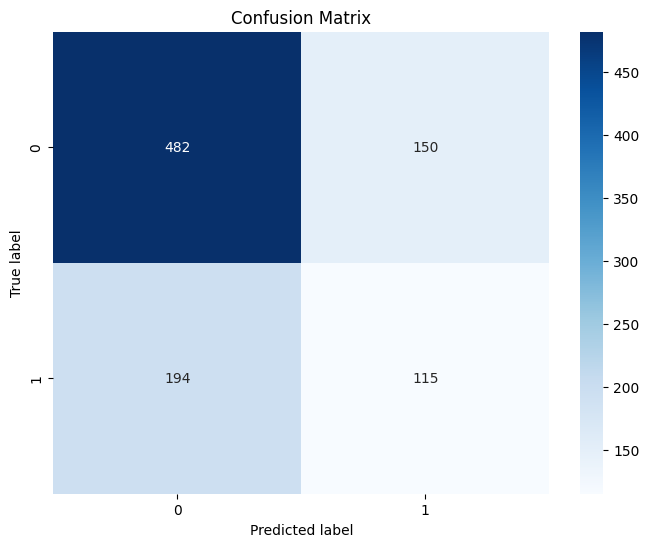

In [ ]:
y_pred = (final_model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
labels = [0, 1]
plot_confusion_matrix(y_test, y_pred, labels=labels, normalize=False, title='Confusion Matrix')

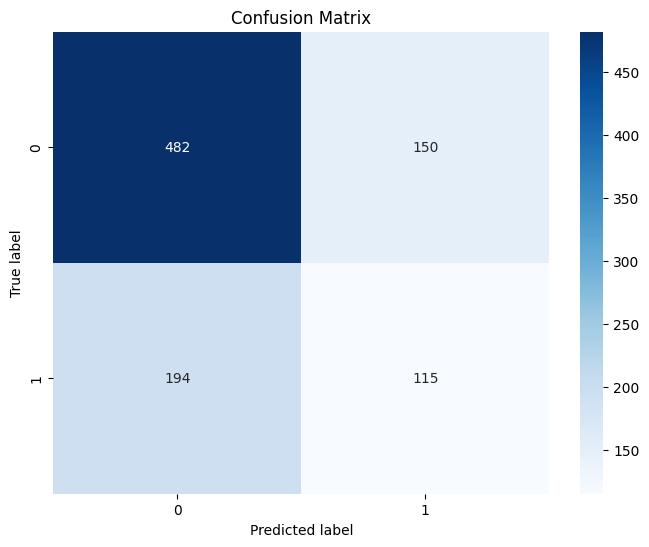

# **Model Interpretability**

**Feature importances**

In [ ]:
def plot_feature_importance(model, max_num_features=20):
    # Get the booster from the trained LGBMClassifier
    booster = model.booster_

    # Get feature importances
    importance = booster.feature_importance(importance_type='gain')
    feature_names = booster.feature_name()
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values(by='importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importances.head(max_num_features))
    plt.title('Feature Importance')
    plt.show()

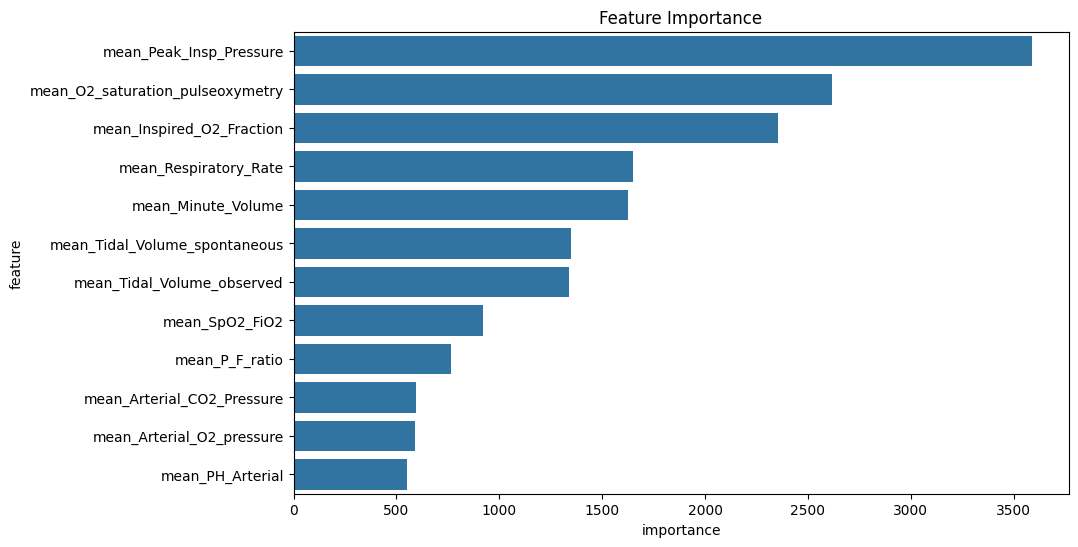

In [ ]:
plot_feature_importance(final_model)

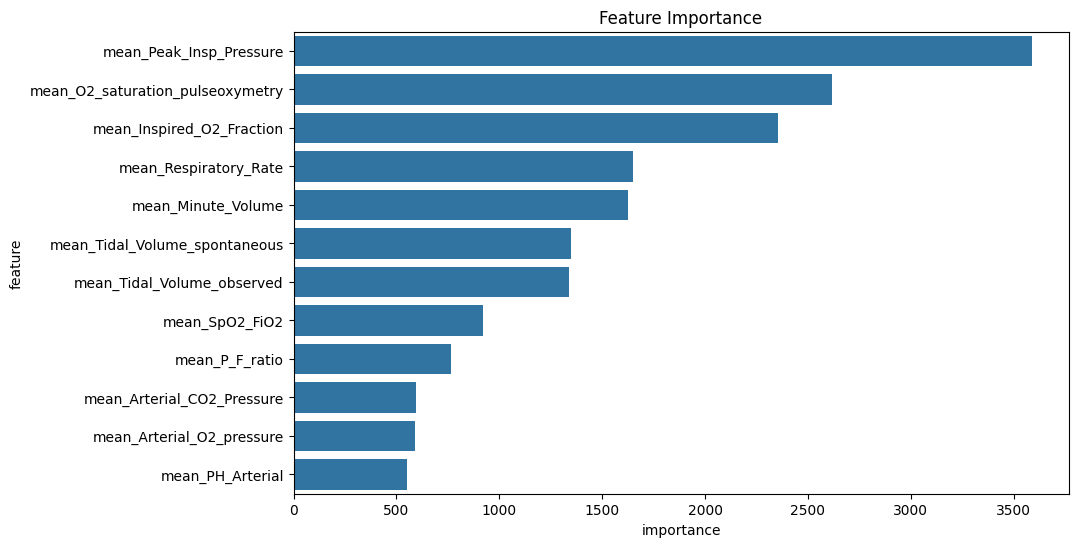

The x-axis refers to gain in feature importance.

Interestingly, SaO2 and FiO2 are also high up here like LSTM.

**Feature ablation**

In [ ]:
def feature_ablation(model, X_train, y_train, X_test, y_test, params, num_boost_round=100):
    # Function to train and evaluate the model
    def train_and_evaluate(X_train, y_train, X_test, y_test):
        train_data = lgb.Dataset(X_train, label=y_train)
        model = lgb.train(params, train_data, num_boost_round=num_boost_round)
        y_pred = model.predict(X_test)
        y_pred_binary = (y_pred >= 0.5).astype(int)

        accuracy = accuracy_score(y_test, y_pred_binary)
        roc_auc = roc_auc_score(y_test, y_pred)
        return accuracy, roc_auc

    # Baseline model with all features
    baseline_accuracy, baseline_roc_auc = train_and_evaluate(X_train, y_train, X_test, y_test)

    # Store results
    results = []

    # Perform feature ablation
    for feature in X_train.columns:
        X_train_ablate = X_train.drop(columns=[feature])
        X_test_ablate = X_test.drop(columns=[feature])

        accuracy, roc_auc = train_and_evaluate(X_train_ablate, y_train, X_test_ablate, y_test)

        results.append({
            'feature': feature,
            'accuracy': accuracy,
            'roc_auc': roc_auc,
            'accuracy_drop': baseline_accuracy - accuracy,
            'roc_auc_drop': baseline_roc_auc - roc_auc
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Plot the results
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    sns.barplot(x='accuracy_drop', y='feature', data=results_df.sort_values(by='accuracy_drop', ascending=False), ax=axes[0])
    axes[0].set_title('Drop in Accuracy After Feature Ablation')
    axes[0].set_xlabel('Drop in Accuracy')

    sns.barplot(x='roc_auc_drop', y='feature', data=results_df.sort_values(by='roc_auc_drop', ascending=False), ax=axes[1])
    axes[1].set_title('Drop in ROC AUC After Feature Ablation')
    axes[1].set_xlabel('Drop in ROC AUC')

    plt.tight_layout()
    plt.show()

    return results_df

[LightGBM] [Warning] Unknown parameter: sampling_method
[LightGBM] [Warning] Unknown parameter: sampling_method
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 3760, number of used features: 12
[LightGBM] [Info] Start training from score 0.328457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

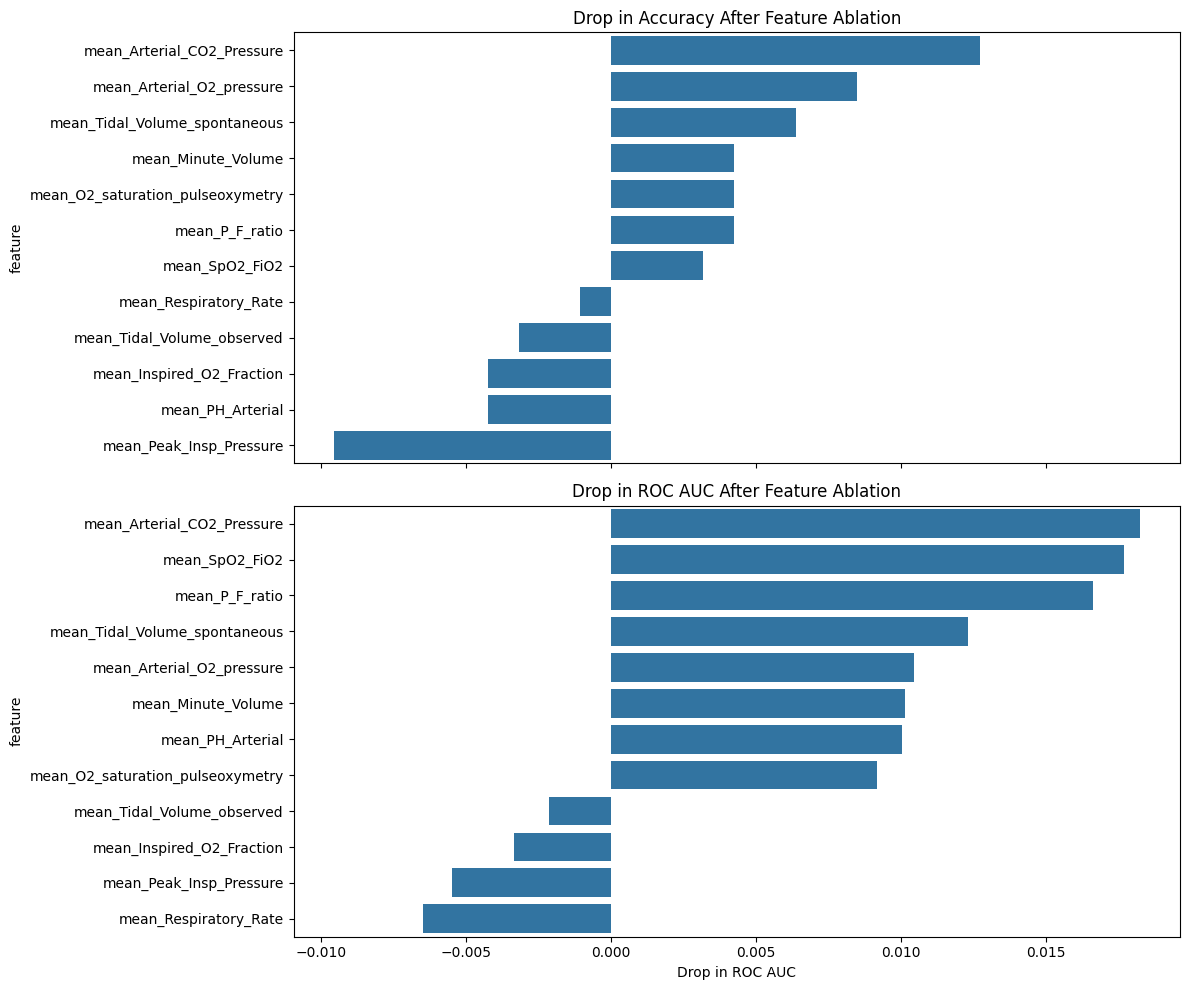

                             feature  accuracy   roc_auc  accuracy_drop  \
0         mean_Arterial_CO2_Pressure  0.658874  0.591834       0.012752   
1          mean_Arterial_O2_pressure  0.663124  0.599637       0.008502   
2          mean_Inspired_O2_Fraction  0.675877  0.613432      -0.004251   
3                 mean_Minute_Volume  0.667375  0.599950       0.004251   
4   mean_O2_saturation_pulseoxymetry  0.667375  0.600902       0.004251   
5                   mean_PH_Arterial  0.675877  0.600047      -0.004251   
6            mean_Peak_Insp_Pressure  0.681190  0.615573      -0.009564   
7              mean_Respiratory_Rate  0.672689  0.616579      -0.001063   
8         mean_Tidal_Volume_observed  0.674814  0.612229      -0.003188   
9      mean_Tidal_Volume_spontaneous  0.665250  0.597768       0.006376   
10                    mean_SpO2_FiO2  0.668438  0.592366       0.003188   
11                    mean_P_F_ratio  0.667375  0.593457       0.004251   

    roc_auc_drop  
0    

In [ ]:
results_df = feature_ablation(final_model, X_train, y_train, X_test, y_test, best_params_exp_4)
print(results_df)

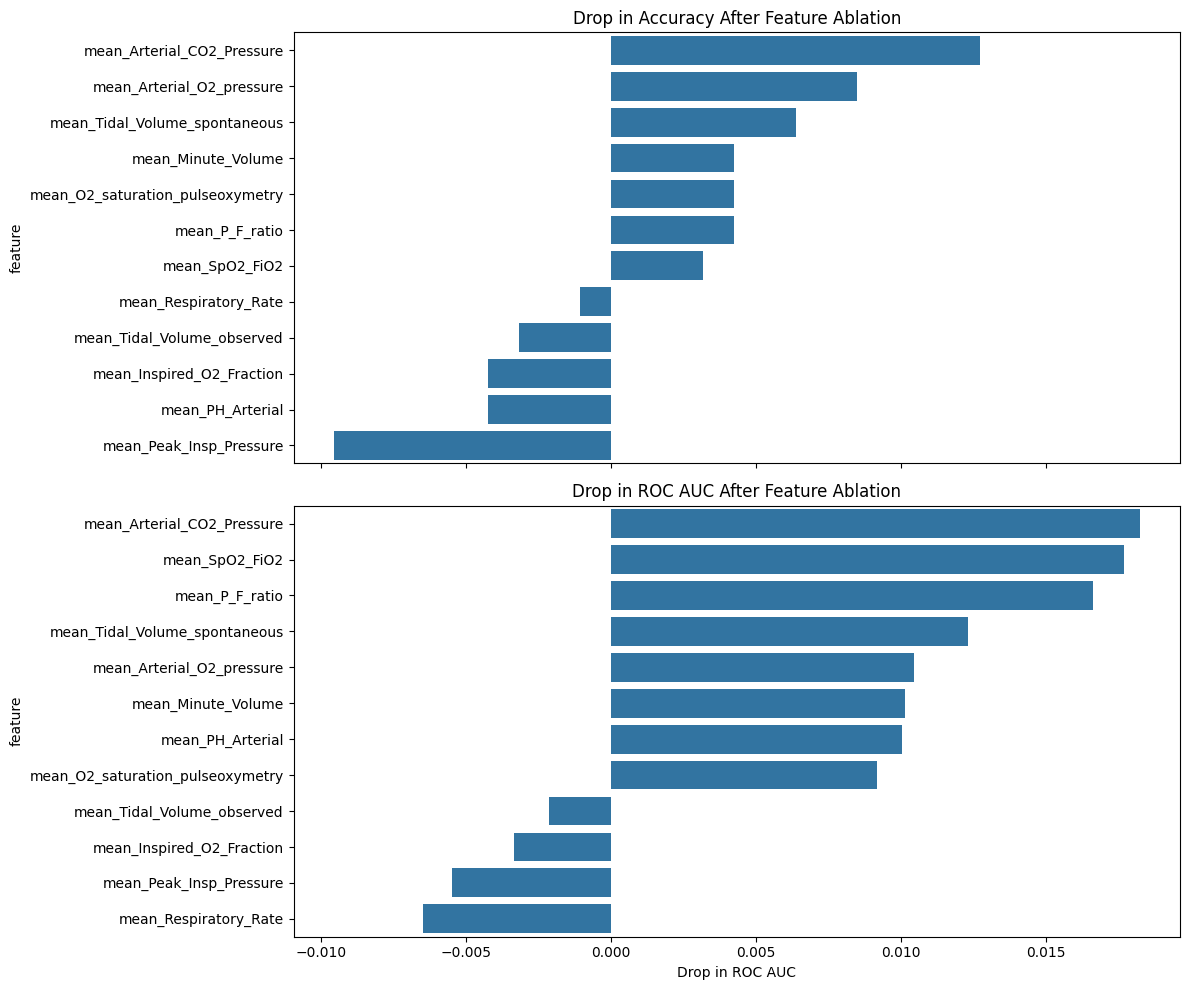

In [ ]:
results_df

feature  accuracy   roc_auc  accuracy_drop  \
0         mean_Arterial_CO2_Pressure  0.658874  0.591834       0.012752   
1          mean_Arterial_O2_pressure  0.663124  0.599637       0.008502   
2          mean_Inspired_O2_Fraction  0.675877  0.613432      -0.004251   
3                 mean_Minute_Volume  0.667375  0.599950       0.004251   
4   mean_O2_saturation_pulseoxymetry  0.667375  0.600902       0.004251   
5                   mean_PH_Arterial  0.675877  0.600047      -0.004251   
6            mean_Peak_Insp_Pressure  0.681190  0.615573      -0.009564   
7              mean_Respiratory_Rate  0.672689  0.616579      -0.001063   
8         mean_Tidal_Volume_observed  0.674814  0.612229      -0.003188   
9      mean_Tidal_Volume_spontaneous  0.665250  0.597768       0.006376   
10                    mean_SpO2_FiO2  0.668438  0.592366       0.003188   
11                    mean_P_F_ratio  0.667375  0.593457       0.004251   

    roc_auc_drop  
0       0.018250  
1       0.010446  
2      -0.003349  
3       0.010134  
4       0.009181  
5       0.010036  
6      -0.005489  
7      -0.006496  
8      -0.002146  
9       0.012315  
10      0.017717  
11      0.016627

**SHAP analysis**

In [ ]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


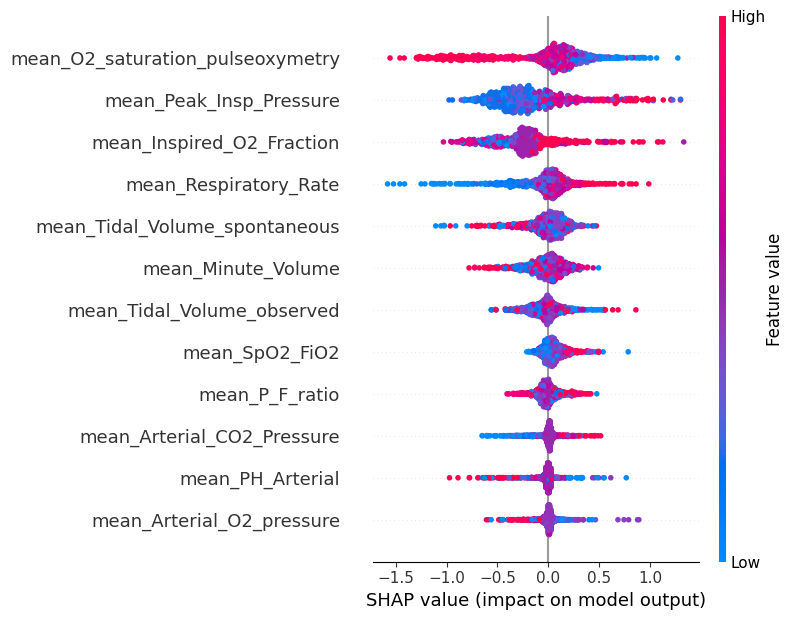

In [ ]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.initjs()
shap.summary_plot(shap_values, X_test)

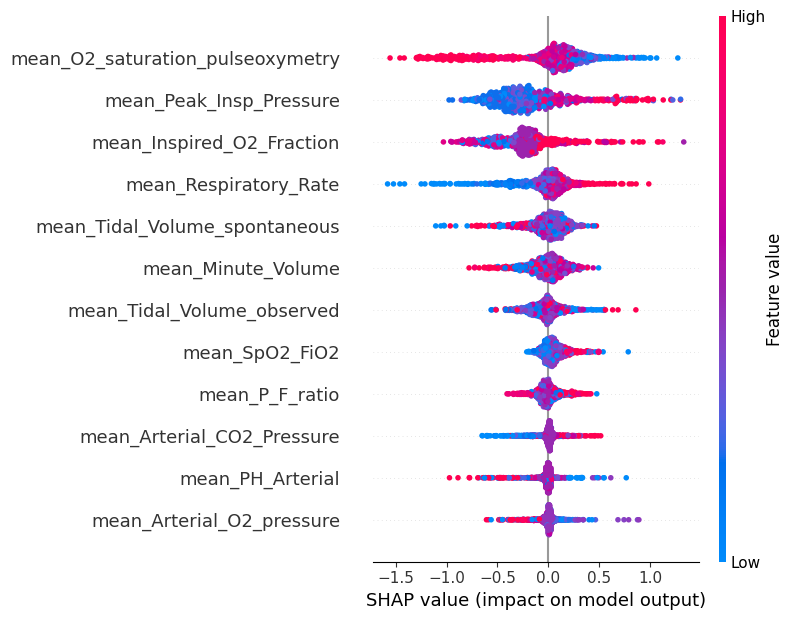

mean_O2_saturation_pulseoxymetry:

High values (red dots) of mean_O2_saturation_pulseoxymetry generally push the prediction towards 0 (extubation success), as indicated by the negative SHAP values.
Low values (blue dots) push the prediction towards 1 (extubation failure).
mean_Peak_Insp_Pressure:

High values of mean_Peak_Insp_Pressure have a mixed impact but mostly push the prediction towards 1 (extubation failure).
Low values seem to have less impact on the model’s prediction.
mean_Inspired_O2_Fraction:

High values push the prediction towards 1 (extubation failure).
Low values push the prediction towards 0 (extubation success).
mean_Respiratory_Rate:

High values push the prediction towards 0 (extubation success).
Low values push the prediction towards 1 (extubation failure).
General Observations
High vs. Low Feature Values:

For some features, high values push the prediction in one direction (either towards extubation success or failure), while low values push it in the opposite direction.
For example, high mean_O2_saturation_pulseoxymetry values are associated with a lower likelihood of extubation failure (positive outcome), while low values are associated with a higher likelihood of failure (negative outcome).
Impact on Predictions:

Features like mean_O2_saturation_pulseoxymetry and mean_Peak_Insp_Pressure have a significant impact on the model’s predictions, as seen by the wide range of SHAP values.
Features at the bottom, like mean_Arterial_CO2_Pressure, have less impact, indicated by their narrower range of SHAP values.

### **Results analysis**

**Plot ROC curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001


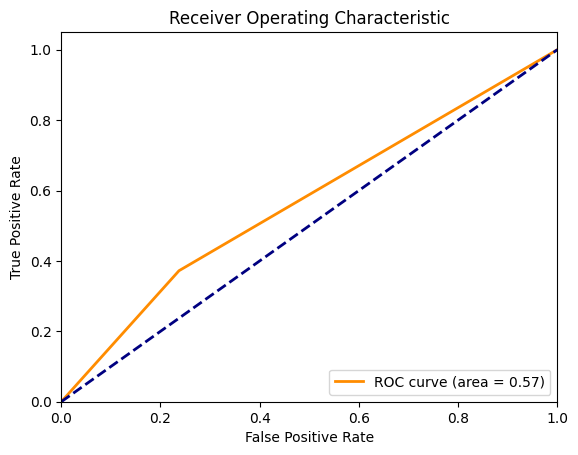

In [ ]:
y_pred_proba = final_model.predict(X_test)
plot_roc_curve(y_test, y_pred_proba)

**Precision-Recall curve**

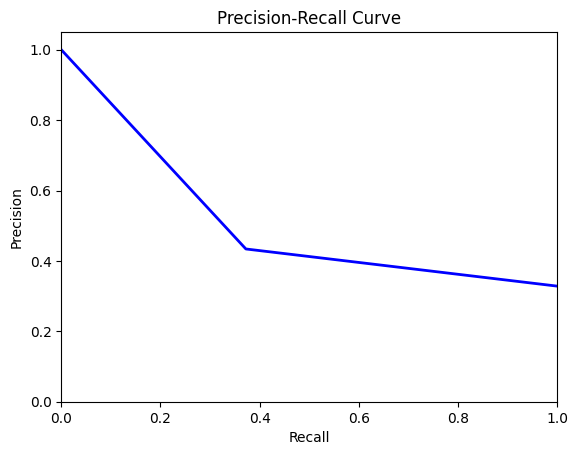

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)

    plt.figure()
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Plot Precision-Recall curve
plot_precision_recall_curve(y_test, y_pred_proba)

**Display the trained tree**

In [ ]:
!pip install graphviz

In [ ]:
# Plot a single tree
def plot_single_tree(model, tree_index, figsize=(20, 10)):
    ax = lgb.plot_tree(model, tree_index=tree_index, figsize=figsize, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
    plt.show()

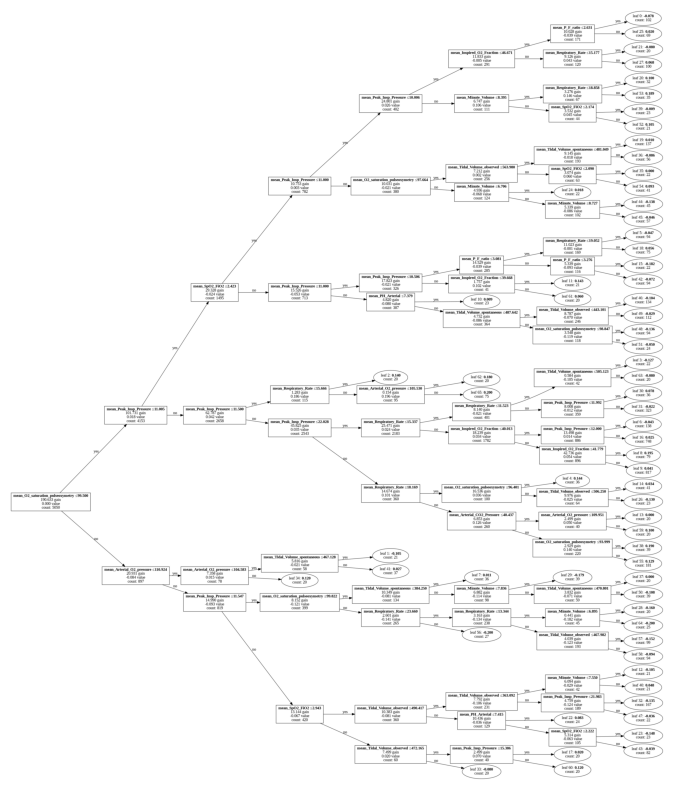

In [ ]:
plot_single_tree(final_model, tree_index=0)

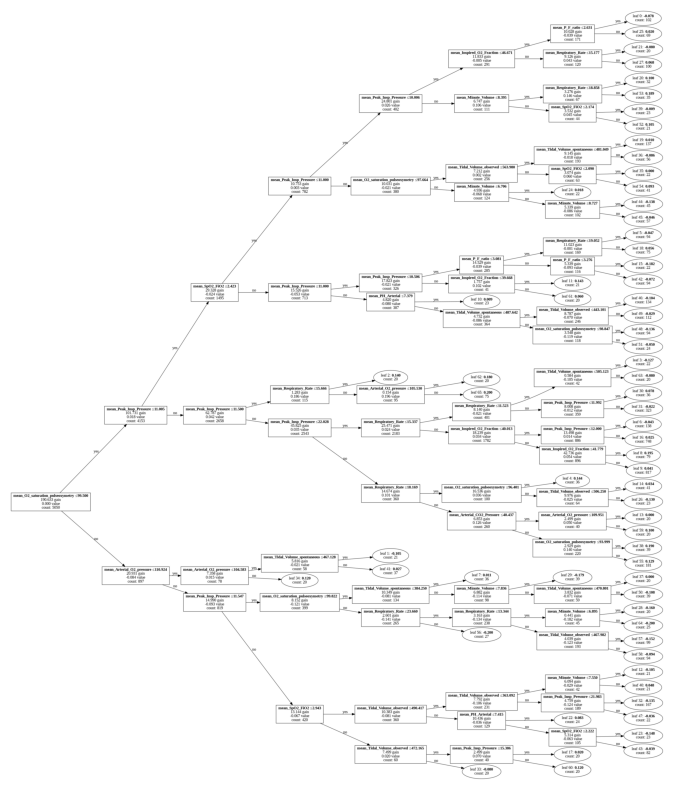

In [ ]:
# Export a single tree to Graphviz format with higher DPI
def export_single_tree_high_dpi(model, tree_index, dpi=300):
    tree = model.booster_.dump_model()['tree_info'][tree_index]
    graph = lgb.create_tree_digraph(model, tree_index=tree_index, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
    graph.attr(dpi=str(dpi))
    return graph

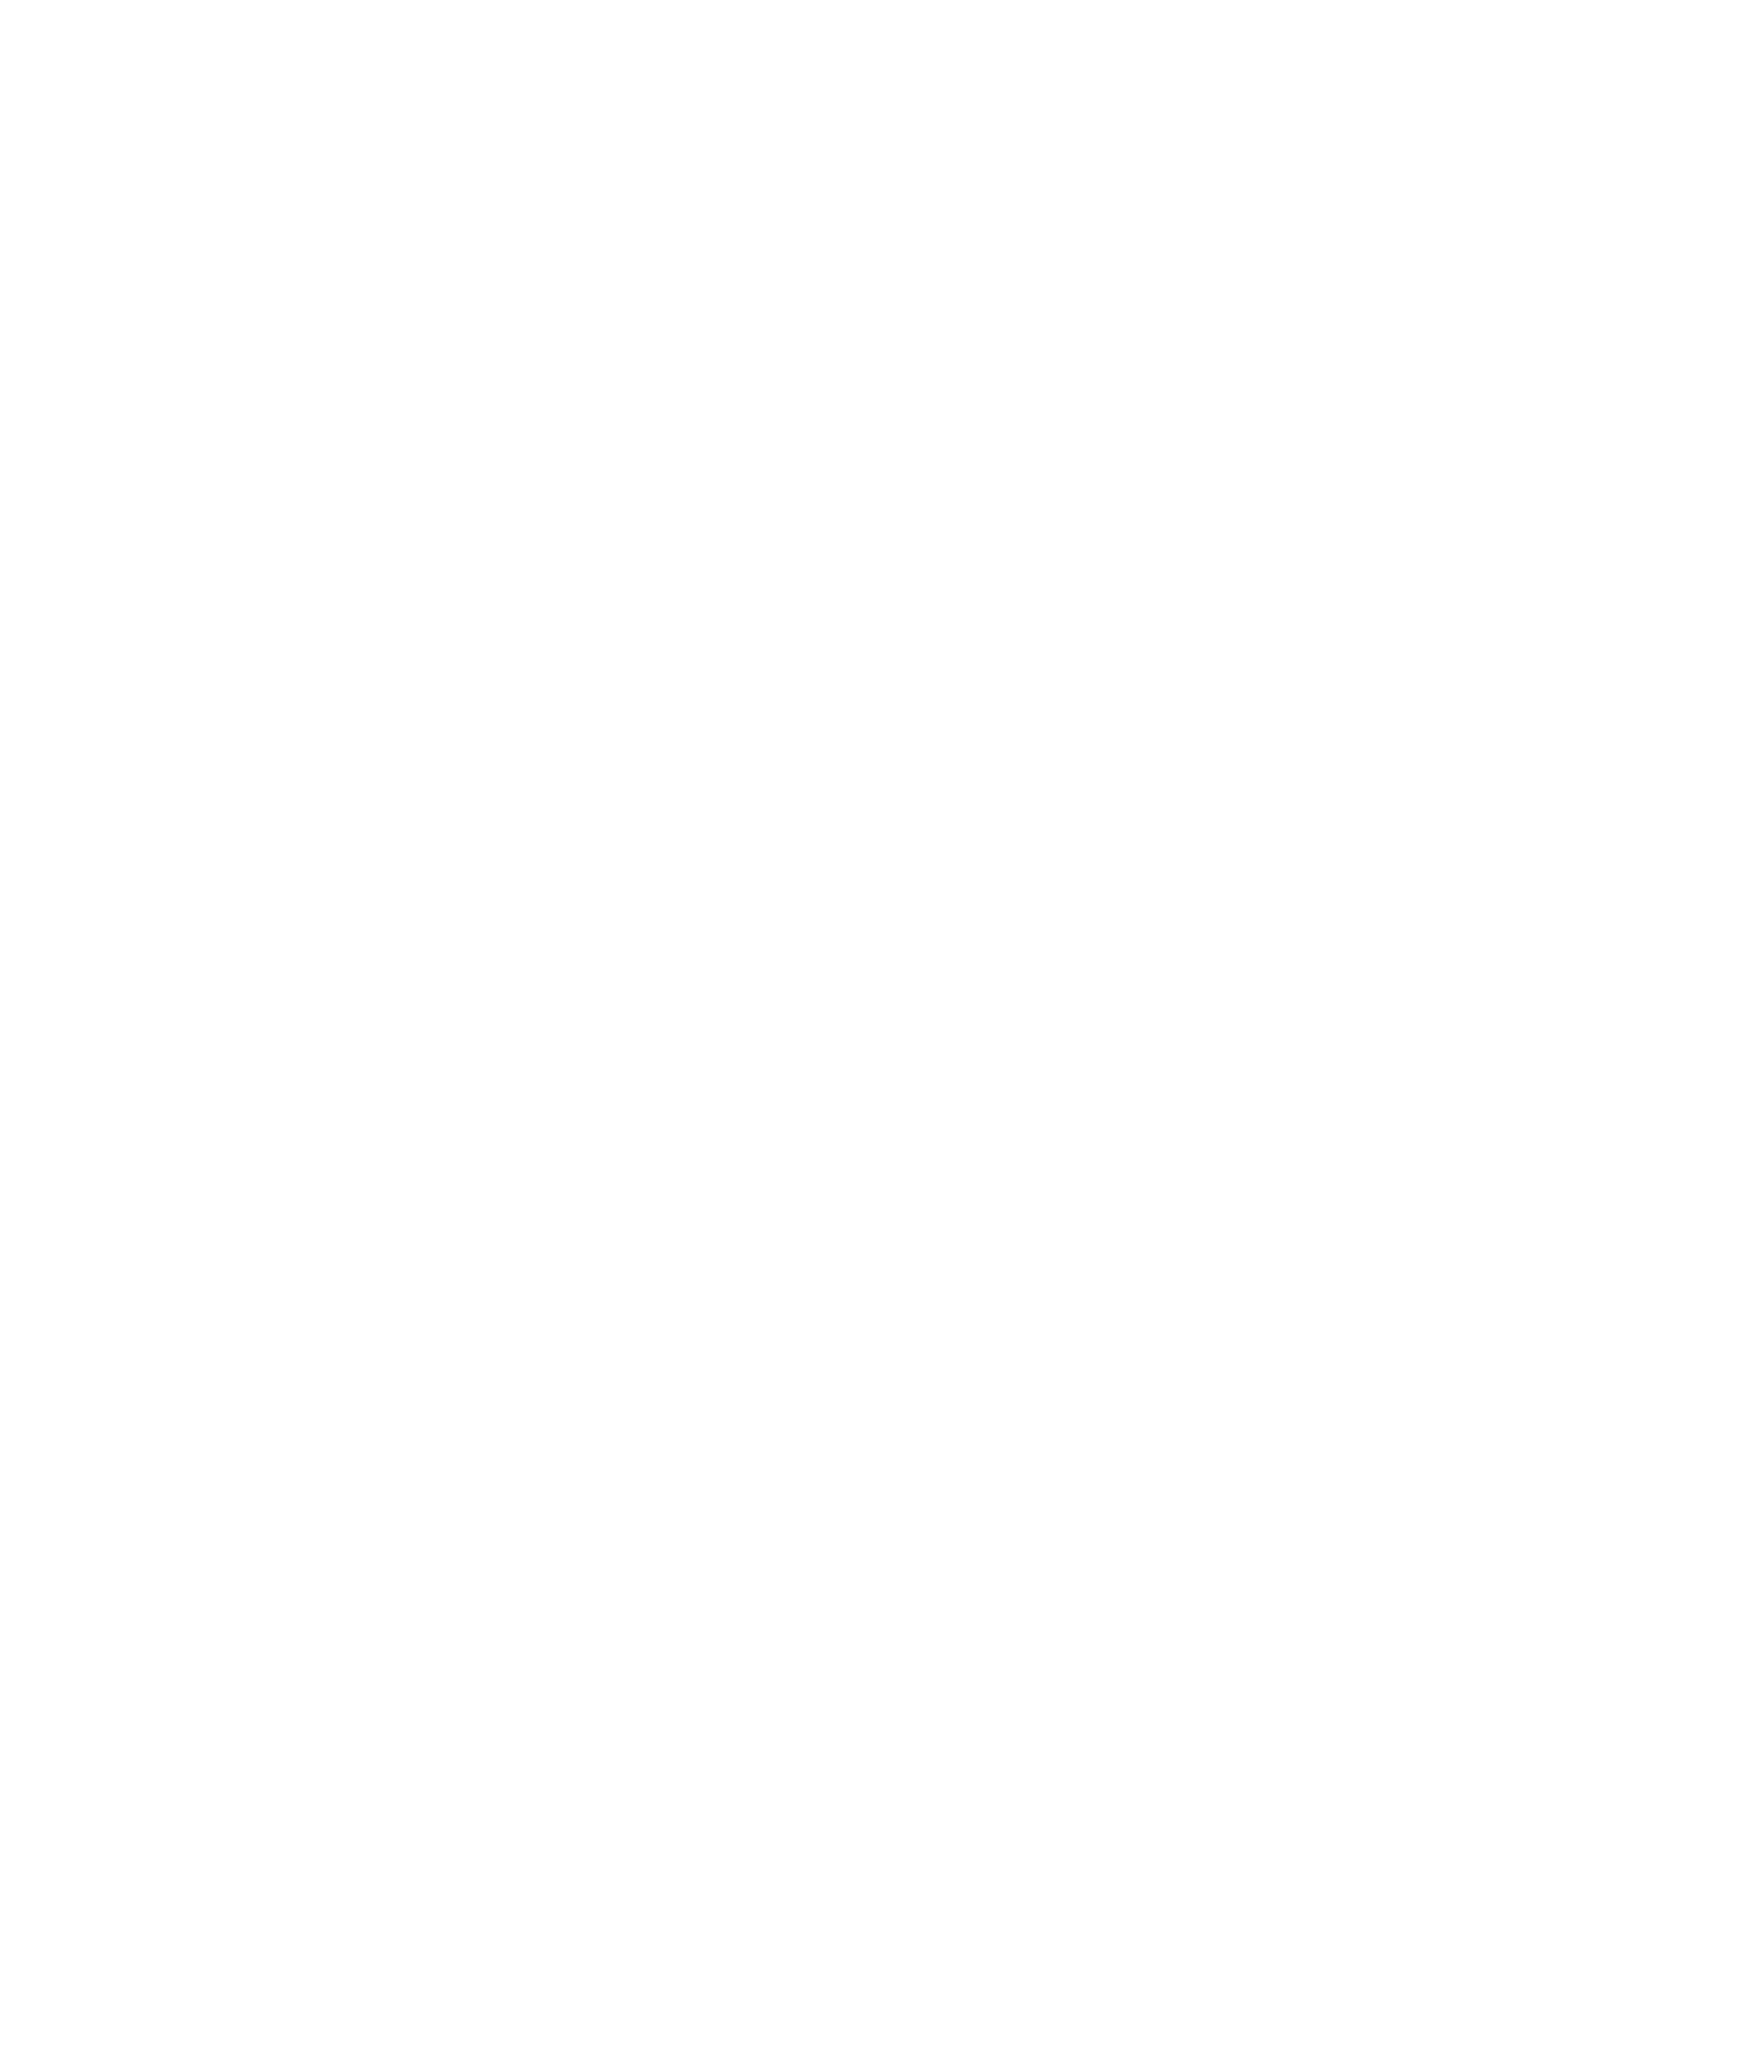

In [ ]:
# Assuming final_model is your trained LightGBM model
graph = export_single_tree_high_dpi(final_model, tree_index=0, dpi=300)
graph.render('tree_high_dpi', format='png', cleanup=True)
graph

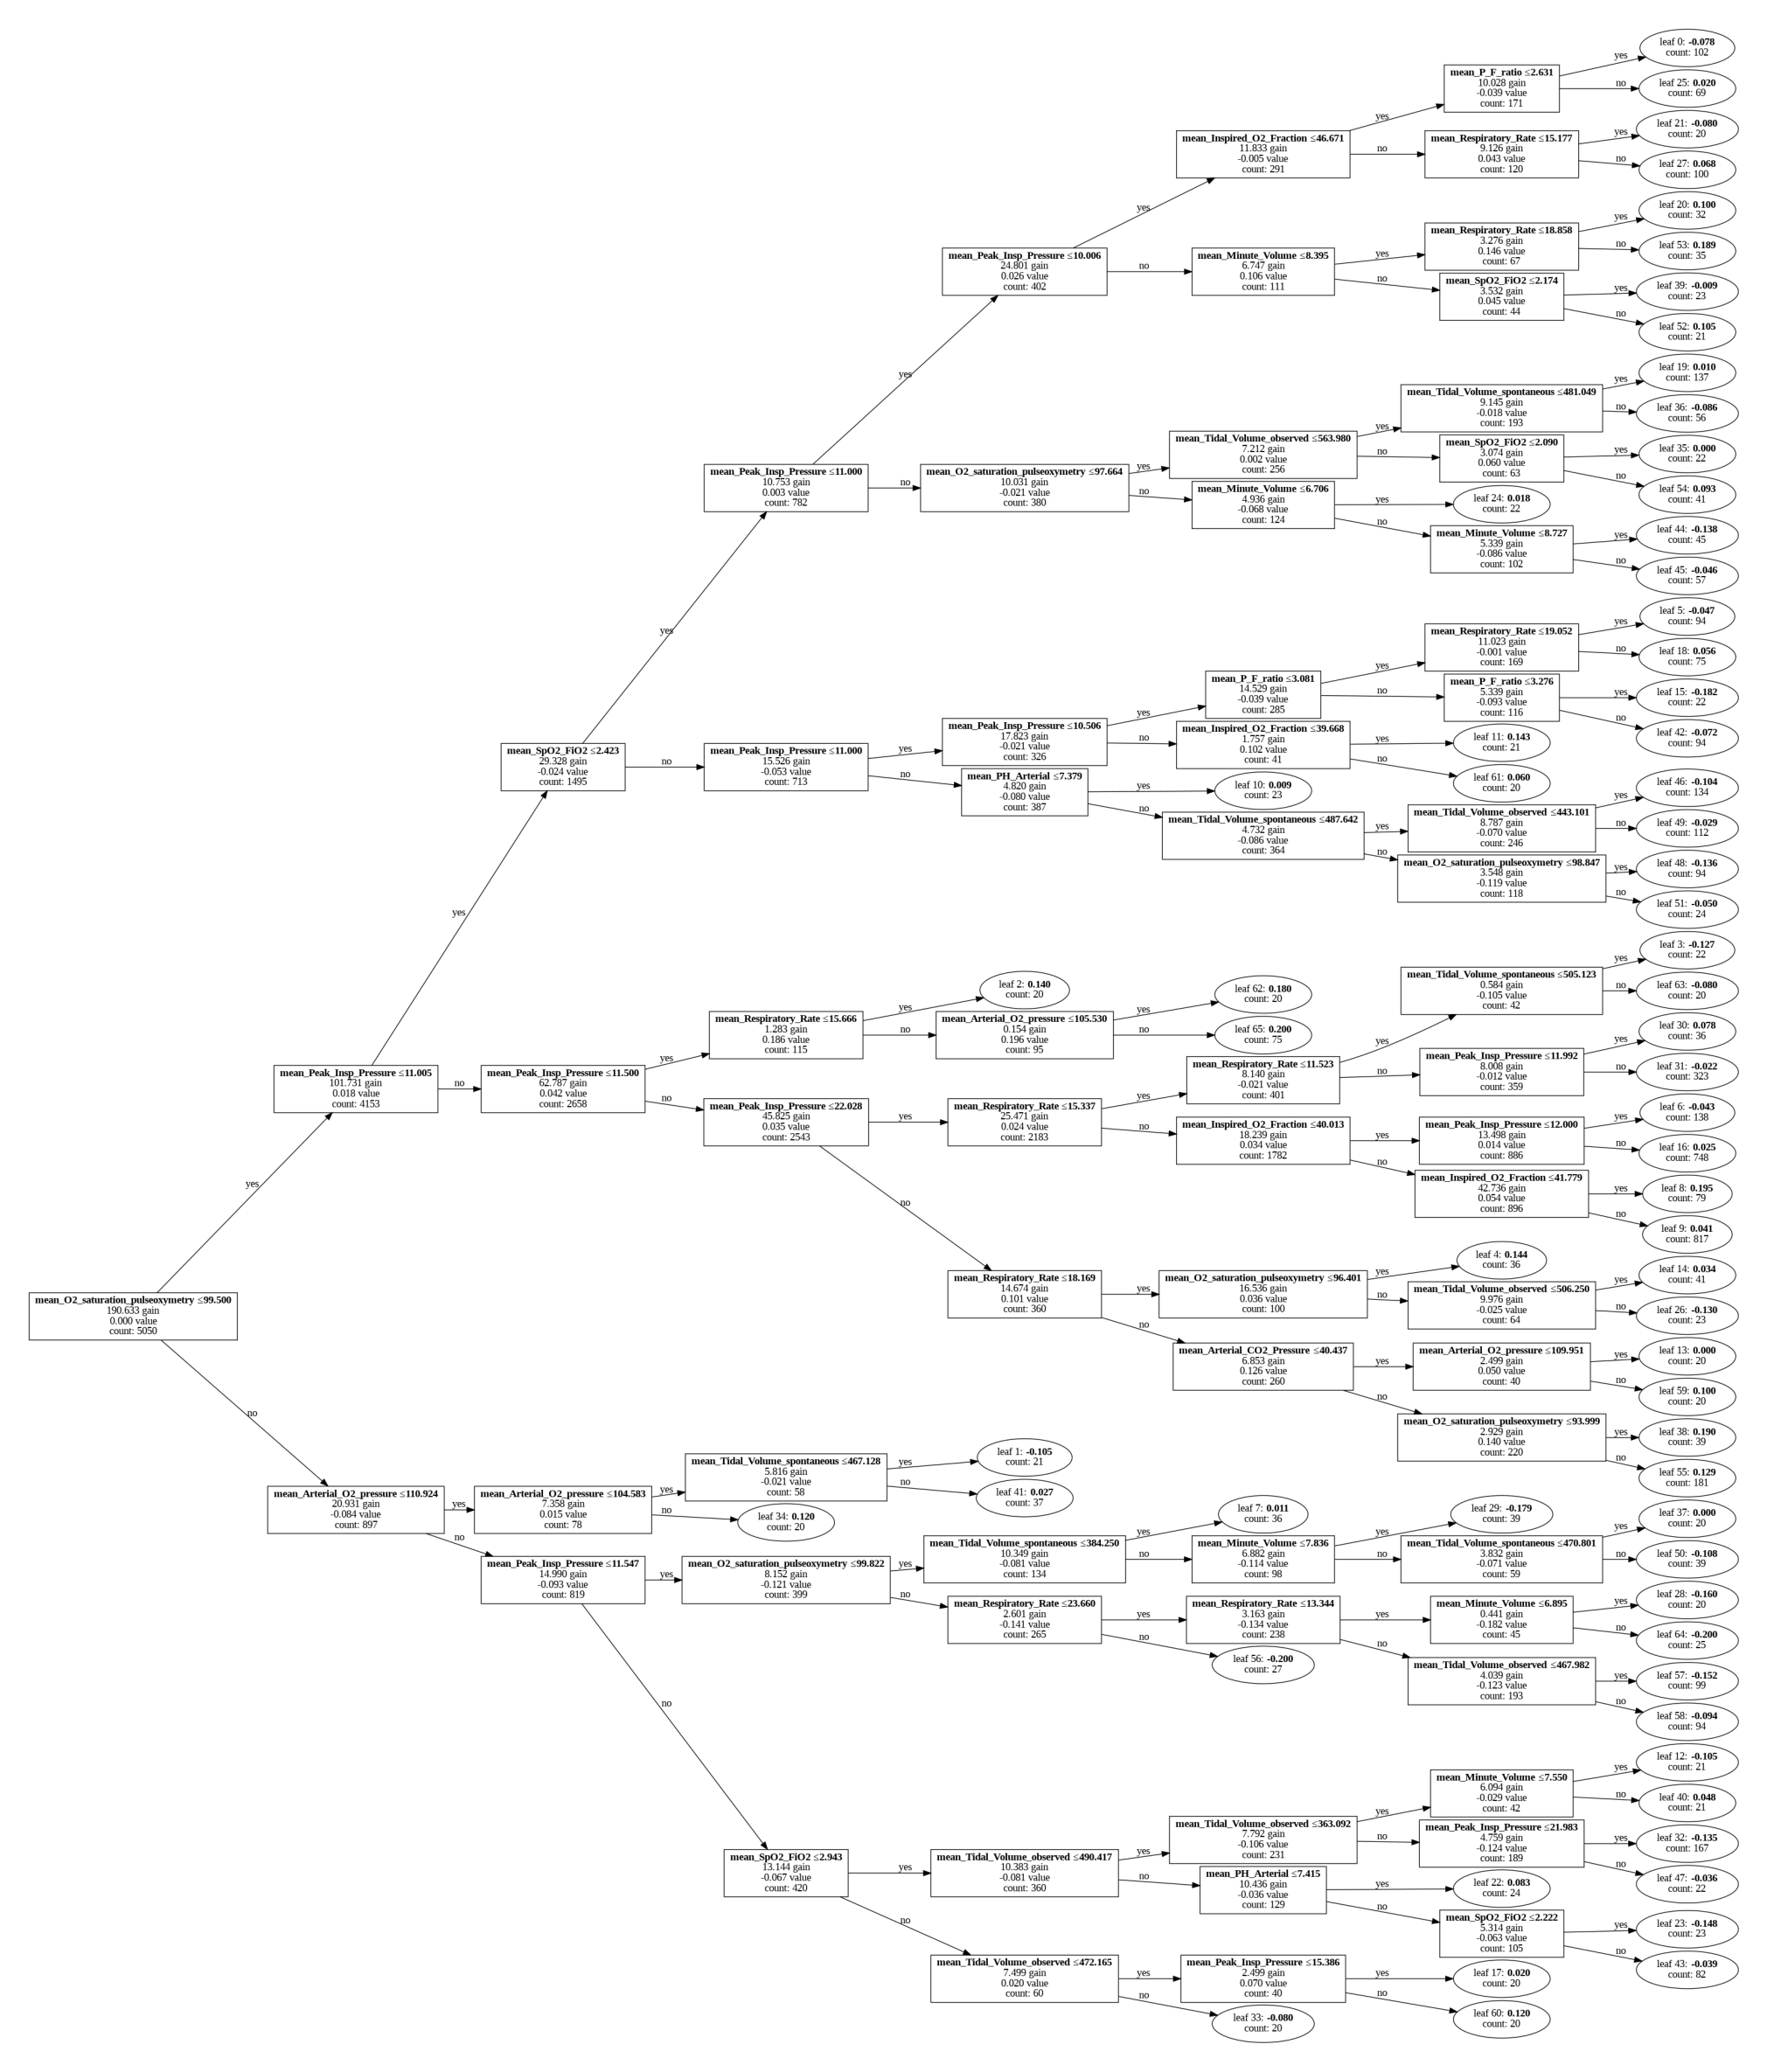

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Function to plot a single tree with high-quality settings
def plot_single_tree_high_quality(model, tree_index, figsize=(20, 10), dpi=300):
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    lgb.plot_tree(model, tree_index=tree_index, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'], ax=ax)
    plt.show()

# Example usage
# Assuming final_model is your trained LightGBM model
plot_single_tree_high_quality(final_model, tree_index=0, figsize=(20, 10), dpi=300)